# Cleaning Data

This is a follow-up notebook to clean the data and specially to drop the columns that I'm not gonna work with. I'm also going to check if all the datatypes are correct.

> ## To do:
In this part I will write any task that I have to do regarding the dataset, so I don't forget.
- [x] Eliminate the ```columns ``` that are not needed for our analysis. 
- [x] Analyze our data through histograms. 
- [x] Eliminate null values that are not needed. 
- [x] Split the column ```genres```, ```production_companies``` and ```cast``` to understand better how many unique values we have in that column.
- [x] Save cleaned dataset as a new file
- [x] Remove duplicate values from ```id```  column
- [x] Remove 0s from ```budget``` and ```revenue```

## Summary:
<ul>
<li><a href="#drop">Drop Columns</a></li>
<li><a href="#histogram">Histogram of our new dataframe</a></li>
<li><a href="#null_info">Gettin rid null values</a></li>
<li><a href="#remove_id">Remove duplicate values from id  column</a></li>
<li><a href="#remove_0s">Remove 0s from budget and revenue</a></li>
<li><a href="#replace">Replace 0s with NAN in runtime</a></li>
<li><a href="#split">Split columns by genre</a></li>
<li><a href="#save">Save cleaned dataset as a new file</a></li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('the_movies_database.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


<a id='drop'></a>
> ## Drop Columns
From the questions we initiated this project, I'm going to eliminate the columsn that are not going to be useful for this project. Here are the columns that I'm going to eliminate:
- ```homepage```
- ```tagline```
- ```overview```
- ```keywords```

> Since the ```budget``` and ```revenue``` columns are misleading due to inflation, I'm going to stick with ```budget_adj``` and ```revenue_adj``` since those numbers are in 2010 USD Dollars. 

In [3]:
df_new = df.drop(columns =['homepage', 'tagline', 'overview', 'budget', 'revenue', 'keywords', 'imdb_id'])

In [4]:
df_new.head(2)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [5]:
df_new.shape

(10866, 14)

<a id='remove_id'></a>
## Remove duplicate values from ```id```  column

In [6]:
sum(df_new.id.duplicated())

1

In [7]:
df_new.drop_duplicates(subset = 'id' , inplace = True) 
sum(df_new.id.duplicated())

0

<a id='remove_0s'></a>
## Remove 0s from ```budget``` and ```revenue```

In [8]:
df_new = df_new[df_new.budget_adj != 0]
df_new[df_new.budget_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [9]:
df_new = df_new[df_new.revenue_adj != 0]
df_new[df_new.revenue_adj == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='replace'></a>
## Replace ```0s``` with ```NAN``` in ```runtime```

In [10]:
df_new[df_new.runtime == 0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [20]:
df_new['runtime'] = df_new['runtime'].fillna(0)

<a id='histogram'></a>
> ## Histogram of our new Dataframe
This is mainly to get a sense of what our data looks like.
- Interesting fact, we can see a lot of more releases from 2000s onwards
- We can also see that most of the votes are between 5, 6 and 7.

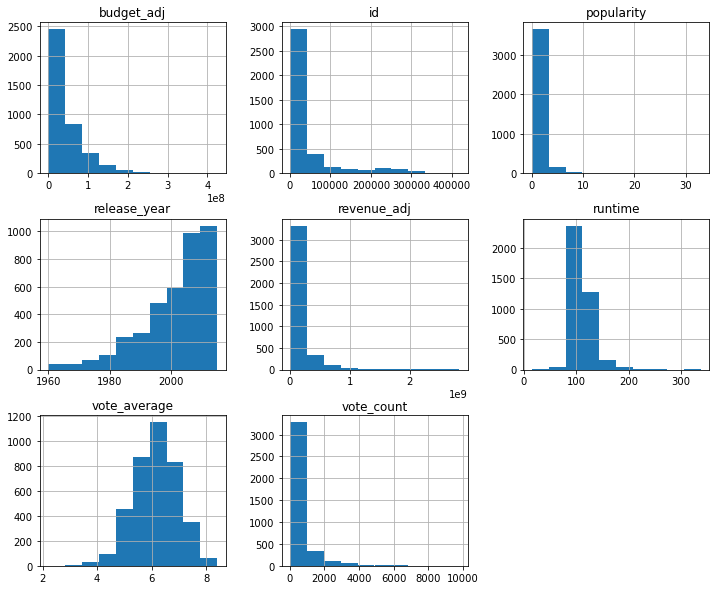

In [12]:
df_new.hist(figsize = (12, 10));

<a id='null_info'></a>
> ## Gettin rid null values: 
- We had 23 rows with null values in Genres, and because ```genre``` is going to be an important column for our analysis, I decided to get rid of those columns.
- Once the cleaning is done, we can see that we have a dataset with less null values.

In [13]:
df_new = df_new.dropna(axis=0, subset=['genres'])

In [14]:
df_new.isnull().sum()

id                       0
popularity               0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

# Data Wrangling Process

<a id='split'></a>
> ## Split columns: 
- Split the column ```genres```, ```production_companies``` and ```cast``` to understand better how many unique values we have in that column.

In [15]:
def split_column(old_dataframe,column, new_name):
    """
    This function will help me split the columns, generate a new name for the new column and also eliminate the old column
    """
    genres = old_dataframe[column].str.split('|', expand = True)
    movies_new = old_dataframe.join(genres)
    movies_new = movies_new.melt(id_vars = list(old_dataframe.columns), value_vars=list(genres.columns))
    movies_new = movies_new.drop(columns = ['variable', column])
    movies_new.rename(columns = {'value': new_name}, inplace = True)
    return movies_new

> - Splitting ```genres```

In [16]:
new_dataframe = split_column(df_new, 'genres', 'genres')
new_dataframe.head(2)

,id,popularity,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action


> - Splitting ```production_companies```

In [17]:
new_dataframe2 = split_column(new_dataframe, 'production_companies', 'production_companies')
new_dataframe2.head(2)

,id,popularity,original_title,cast,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures


> - Splitting ```cast```

In [18]:
cleaned_df = split_column(new_dataframe2, 'cast', 'cast')
cleaned_df.head(2)

,id,popularity,original_title,director,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,production_companies,cast
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,Action,Universal Studios,Chris Pratt
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,Action,Village Roadshow Pictures,Tom Hardy


<a id='save'></a>
> ## Save cleaned dataset as a new file: 

In [19]:
#cleaned_df.to_csv('clean_dataset.csv', index=False)